# Data Understanding and Exploration

In [87]:
# To Load the Dataset
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns



df = pd.read_csv("synthetic_food_dataset_imbalanced.csv") 


print("Dataset Shape:", df.shape)
print("\nColumn Names:\n", df.columns.tolist())

print("\nBasic Statistics:\n")
print(df.describe())

df.head()


Dataset Shape: (31700, 16)

Column Names:
 ['Calories', 'Protein', 'Fat', 'Carbs', 'Sugar', 'Fiber', 'Sodium', 'Cholesterol', 'Glycemic_Index', 'Water_Content', 'Serving_Size', 'Meal_Type', 'Preparation_Method', 'Is_Vegan', 'Is_Gluten_Free', 'Food_Name']

Basic Statistics:

           Calories       Protein           Fat         Carbs         Sugar  \
count  31325.000000  31325.000000  31325.000000  31325.000000  31325.000000   
mean     273.378441      9.523802     12.476848     28.943200      8.543813   
std      111.457160      8.024212      8.425834     12.668795      7.989075   
min       60.786204      0.000000      0.000000      0.000000      0.000000   
25%      210.301731      3.858307      8.245636     25.098800      3.739656   
50%      281.774249      9.091637     11.574161     29.681430      5.500479   
75%      329.821946     12.683957     15.818611     34.635789     14.426303   
max     1289.956763     81.761772     88.619611    140.585537     78.548162   

             

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Meal_Type,Preparation_Method,Is_Vegan,Is_Gluten_Free,Food_Name
0,290.463673,14.340084,14.152608,35.266644,4.828030,1.291432,647.553389,24.990309,81.575896,45.669118,197.570043,dinner,fried,False,False,Pizza
1,212.626748,4.080908,11.621584,23.218957,16.347814,0.130303,68.572414,34.301652,69.522492,49.854415,103.833510,snack,raw,False,True,Ice Cream
2,330.695408,14.326708,19.747680,29.479164,6.251137,0.794477,663.171859,34.816834,62.552384,40.132866,198.989367,snack,raw,False,False,Burger
3,198.070798,9.452445,5.475896,32.097878,2.984621,1.710468,300.749543,28.510998,68.688853,57.423461,135.714202,lunch,fried,False,True,Sushi
4,274.496228,6.099547,16.256002,29.756638,17.352958,1.465676,296.314958,15.403173,70.385059,33.170460,73.019474,snack,baked,False,False,Donut


In [89]:
# To understand inter-class variation

if 'Meal_Type' in df.columns:
    print("\nSample entries for each meal type:\n")
    sampled_df = pd.concat([
        group.sample(2, random_state=1) for _, group in df.groupby('Meal_Type')
    ])
    print(sampled_df.reset_index(drop=True))
else:
    print("❗️Column 'Meal_Type' not found. Please rename your target column or update the script.")



Sample entries for each meal type:

     Calories    Protein        Fat      Carbs      Sugar     Fiber  \
0  121.074935   1.497248   4.909268  13.113015   4.513605  6.965831   
1  361.034654  20.039226  21.965404  27.186687   4.999519  4.110737   
2  278.948974   3.483856  15.418272  32.854096  15.015949  0.771139   
3  270.519798   4.702894  18.576904  32.426667  18.405099  1.182877   
4  176.241243   3.454805   9.400803  27.672848  21.903157  0.658196   
5  115.056592   1.230405   0.322711  27.504620  13.864064  3.230263   
6  209.019739   3.465029  12.637229  18.764822  17.853307  0.675238   
7  214.825870   3.436210  14.223003  22.559527  13.774919  0.605005   

       Sodium  Cholesterol  Glycemic_Index  Water_Content  Serving_Size  \
0   78.597736     0.000000       28.827074      88.831986    109.690251   
1  708.122582    33.950234       75.870656      45.075121    196.186703   
2  323.355070    18.875341       69.767598      28.530838     80.000696   
3  326.059836    15.607

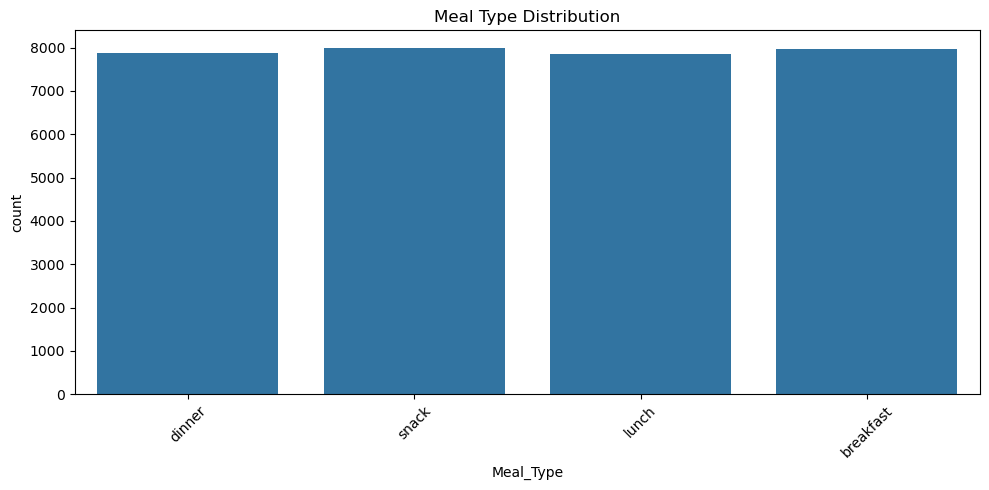

In [91]:
# Class distribution of Meal_Type
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.countplot(x='Meal_Type', data=df)
plt.title("Meal Type Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [93]:
# Missing values
print("\nMissing Values:\n", df.isnull().sum())

# Check for duplicates
print("\nDuplicate Rows:", df.duplicated().sum())

# Data types
print("\nData Types:\n", df.dtypes)



Missing Values:
 Calories              375
Protein               375
Fat                   375
Carbs                 375
Sugar                 375
Fiber                 375
Sodium                375
Cholesterol           375
Glycemic_Index        375
Water_Content         375
Serving_Size          375
Meal_Type               0
Preparation_Method      0
Is_Vegan                0
Is_Gluten_Free          0
Food_Name               0
dtype: int64

Duplicate Rows: 313

Data Types:
 Calories              float64
Protein               float64
Fat                   float64
Carbs                 float64
Sugar                 float64
Fiber                 float64
Sodium                float64
Cholesterol           float64
Glycemic_Index        float64
Water_Content         float64
Serving_Size          float64
Meal_Type              object
Preparation_Method     object
Is_Vegan                 bool
Is_Gluten_Free           bool
Food_Name              object
dtype: object


# Data Preprocessing

In [95]:
# To Handle Missing values

print("Missing Values:\n", df.isnull().sum())

df = df.dropna()

# To remove duplicate values
print("Duplicate Rows:", df.duplicated().sum())

df = df.drop_duplicates()


Missing Values:
 Calories              375
Protein               375
Fat                   375
Carbs                 375
Sugar                 375
Fiber                 375
Sodium                375
Cholesterol           375
Glycemic_Index        375
Water_Content         375
Serving_Size          375
Meal_Type               0
Preparation_Method      0
Is_Vegan                0
Is_Gluten_Free          0
Food_Name               0
dtype: int64
Duplicate Rows: 65


In [97]:
# Winsorization

import numpy as np
def cap_outliers(df, cols, lower=0.01, upper=0.99):
    for col in cols:
        lower_val = df[col].quantile(lower)
        upper_val = df[col].quantile(upper)
        df[col] = np.where(df[col] < lower_val, lower_val, df[col])
        df[col] = np.where(df[col] > upper_val, upper_val, df[col])
    return df

# Apply on numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df = cap_outliers(df, numeric_cols)


In [99]:
# Standardize Numerical Features
from sklearn.preprocessing import StandardScaler

# Scale numerical features
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df_scaled.head()

print("Final shape:", df_scaled.shape)
print("Missing values after cleaning:\n", df_scaled.isnull().sum().sum())



Final shape: (31260, 16)
Missing values after cleaning:
 0


# Feature Engineering

In [101]:
# Label Encode Class Labels
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
df['Meal_Type'] = le.fit_transform(df['Meal_Type']) 
y = df['Meal_Type']

class_names = le.classes_
print("Class Encoding Mapping:")
print(dict(zip(range(len(class_names)), class_names)))


Class Encoding Mapping:
{0: 'breakfast', 1: 'dinner', 2: 'lunch', 3: 'snack'}


In [137]:
#Standardize Features and Apply PCA
X_selected = df.drop('Meal_Type', axis=1)  
y = df['Meal_Type']
X = X.select_dtypes(include=[np.number])

X.replace([np.inf, -np.inf], np.nan, inplace=True)

X = X.fillna(X.median(numeric_only=True))

print(" Any NaN left?:", X.isnull().values.any())        
print(" Data types clean:", all(np.issubdtype(t, np.number) for t in X.dtypes))


 Any NaN left?: False
 Data types clean: True


In [139]:
# PCA

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print(" Final PCA shape:", X_pca.shape)


 Final PCA shape: (31260, 7)


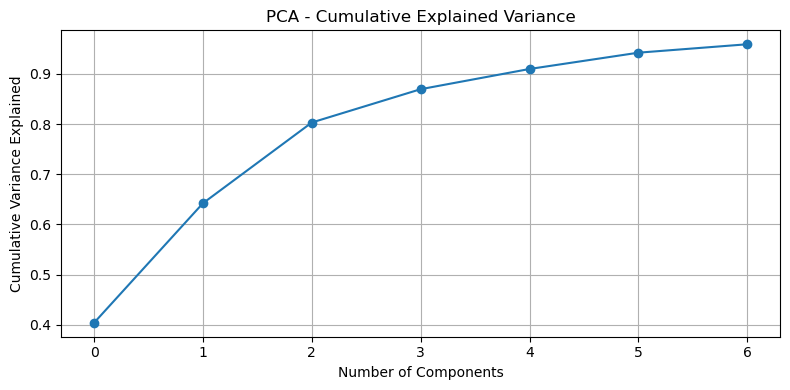

In [107]:
#Visualize Variance by PCA Components
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title("PCA - Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Explained")
plt.grid(True)
plt.tight_layout()
plt.show()


# Model Selection and Training

In [41]:
!pip install xgboost


In [111]:
# Model training: 7 classifiers
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)


In [113]:

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "Gradient Boosting": GradientBoostingClassifier()
}



🔷 Logistic Regression
Accuracy: 0.9333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.94      0.94      0.94        16
           2       0.83      0.83      0.83         6

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



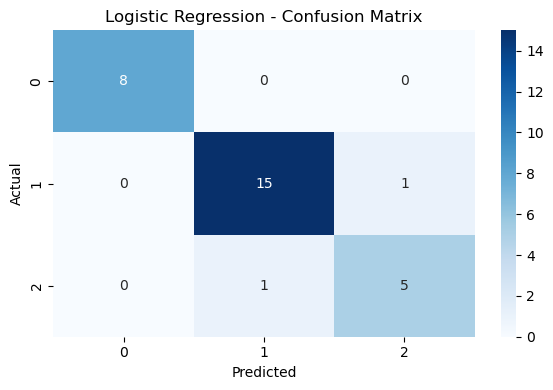

In [119]:
#Confusion matrix plots
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2)

def evaluate_model(name, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n🔷 {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'{name} - Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    plt.tight_layout()
    plt.show()

evaluate_model("Logistic Regression", LogisticRegression())


✅ Best Model: Gradient Boosting
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



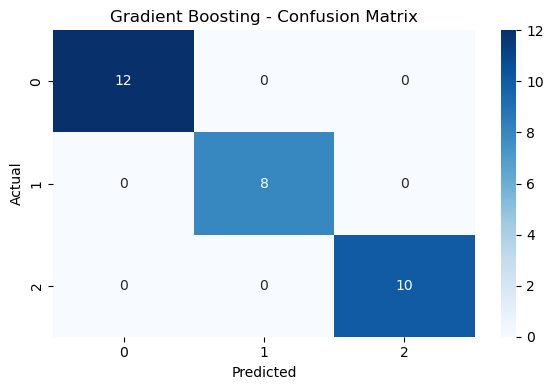

In [151]:
#best model (Gradient Boosting)
from sklearn.ensemble import GradientBoostingClassifier


best_model = GradientBoostingClassifier(random_state=42)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("✅ Best Model: Gradient Boosting")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Gradient Boosting - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


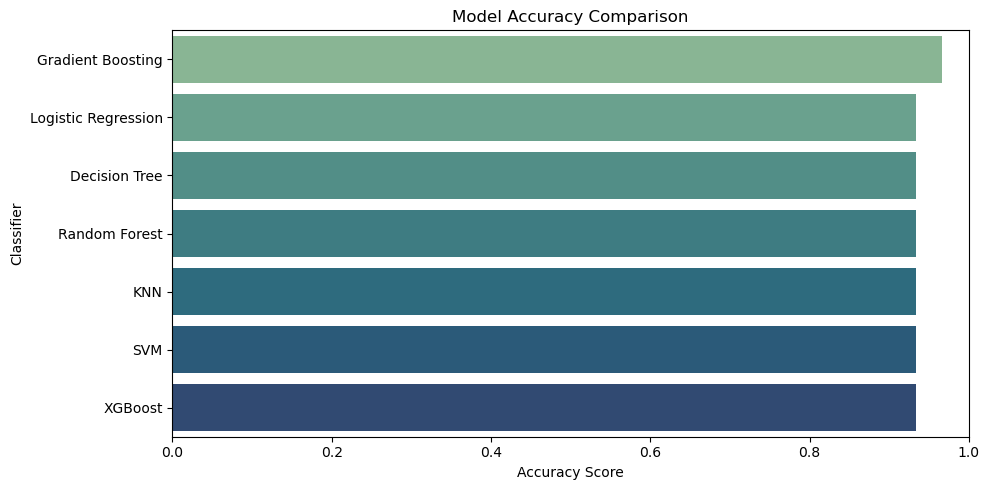

In [129]:
#Accuracy comparison table
plt.figure(figsize=(10, 5))
sns.barplot(x='Accuracy', y='Model', data=results_df, palette='crest')
plt.title("Model Accuracy Comparison")
plt.xlim(0, 1)
plt.xlabel("Accuracy Score")
plt.ylabel("Classifier")
plt.tight_layout()
plt.show()


In [133]:

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append((name, acc))

# Create and display results table
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy']).sort_values(by='Accuracy', ascending=False)
print(results_df)


                 Model  Accuracy
6    Gradient Boosting  0.966667
0  Logistic Regression  0.933333
1        Decision Tree  0.933333
2        Random Forest  0.933333
3                  KNN  0.933333
4                  SVM  0.933333
5              XGBoost  0.933333


In [143]:
X_selected = df.drop('Meal_Type', axis=1)
X_selected.select_dtypes(exclude=['number']).columns


Index(['Preparation_Method', 'Is_Vegan', 'Is_Gluten_Free', 'Food_Name'], dtype='object')

In [145]:
X_selected = df.drop('Meal_Type', axis=1)

# Convert categorical columns to one-hot
X_selected = pd.get_dummies(X_selected)

# Confirm no object columns left
print("Any object columns left?", X_selected.select_dtypes(include='object').any().any())

# Target variable
y = df['Meal_Type']


Any object columns left? False


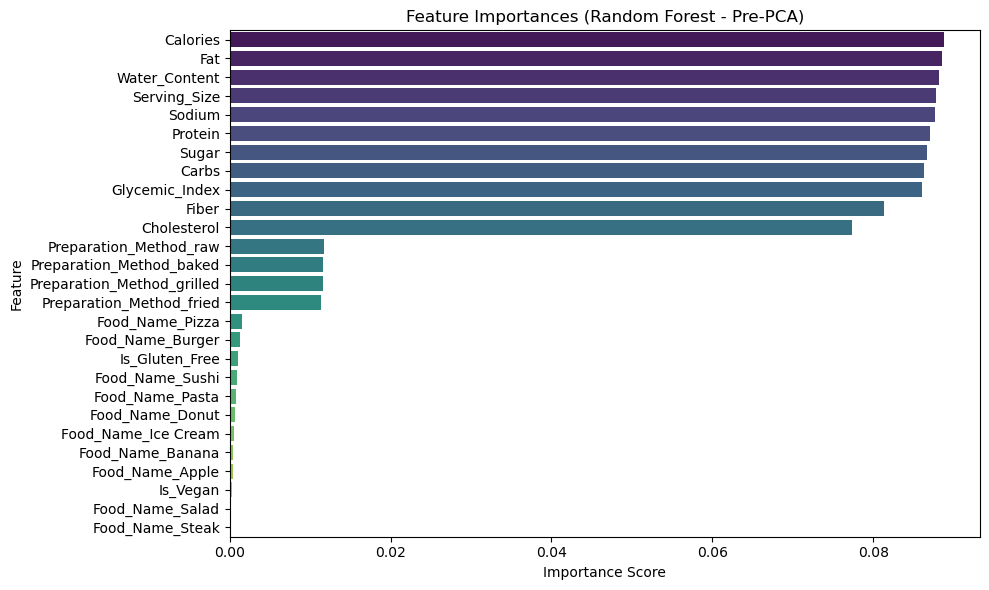

In [147]:
#Feature importance (pre-PCA)
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_selected, y)

importances = best_model.feature_importances_
features = X_selected.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices], palette='viridis')
plt.title("Feature Importances (Random Forest - Pre-PCA)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
